# <center> Task 3: Credit Card Default Prediction </center>

In [1]:
%autosave 10

Autosaving every 10 seconds


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
filepath="C:/Users/uttam/anaconda3/Technocolabs/MinorProj2/Datasets/cleaned_data.csv"
df= pd.read_csv(filepath)
df.head()

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [4]:
# I had renamed 'default payment next month' to 'DEFAULT' in Task 1

X_train1, X_test1, y_train1, y_test1 = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['DEFAULT'].values,
test_size=0.2, random_state=69)

X_train2, X_test2, y_train2, y_test2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['DEFAULT'].values,
test_size=0.2, random_state=69)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [5]:
LogisticRegressor1= LogisticRegression()
LogisticRegressor1.fit(X_train1,y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [6]:
LogisticRegressor2 = LogisticRegression()
LogisticRegressor2.fit(X_train2,y_train2)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [7]:
#help(LogisticRegression.predict_proba)
y_test1_predict_prob = LogisticRegressor1.predict_proba(X_test1)
y_test2_predict_prob = LogisticRegressor2.predict_proba(X_test2)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [8]:
# ROC AUC for LIMIT_BAL
metrics.roc_auc_score(y_test2,y_test2_predict_prob[:,1])

0.6145766511861087

In [9]:
# ROC_AUC for EDUCATION
metrics.roc_auc_score(y_test1,y_test1_predict_prob[:,1])

0.5195412012688772

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve for Logistic Regression using LIMIT_BAL')

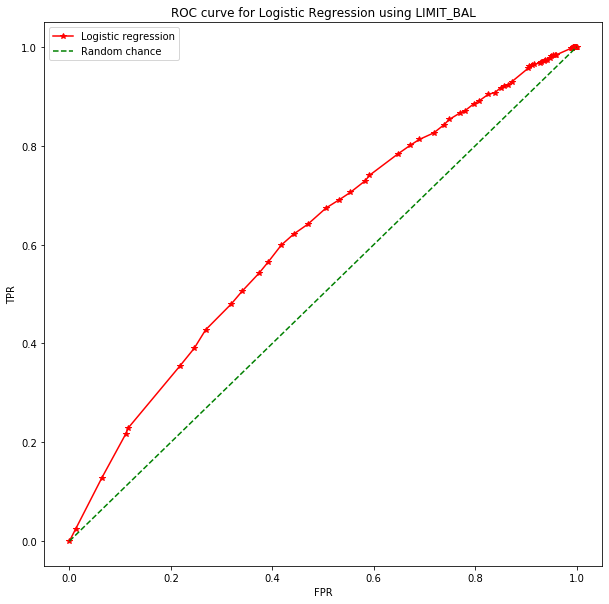

In [10]:
#Plotting ROC Curve for LIMIT_BAL
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test2, y_test2_predict_prob[:,1])

plt.figure(figsize=(10,10))
plt.plot(fpr_2, tpr_2, 'r*-')
plt.plot([0, 1], [0, 1], 'g--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Logistic Regression using LIMIT_BAL')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [11]:
precision, recall, threshold= metrics.precision_recall_curve(y_test2,y_test2_predict_prob[:,1])

_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


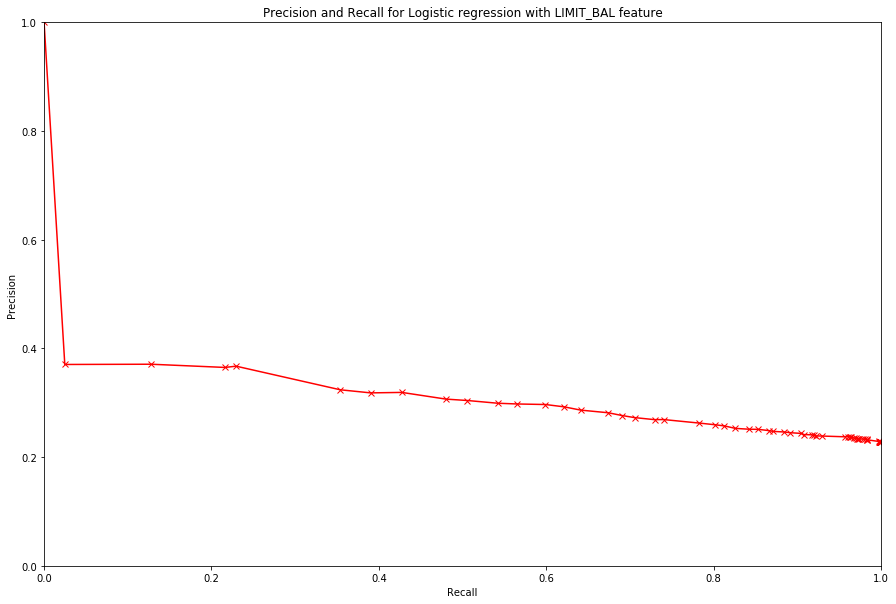

In [12]:
plt.figure(figsize=(15,10))
plt.plot(recall,precision,'r-x')
plt.ylabel('Precision')
plt.xlabel('Recall')
#Restrictions to calculate AUC
plt.xlim([0,1])
plt.ylim([0,1])
plt.title('Precision and Recall for Logistic regression with LIMIT_BAL feature')
plt.show()

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [13]:
print("Area under Curve is: ",metrics.auc(recall,precision))

Area under Curve is:  0.31553970738310594


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [14]:
#Calculating for train
y_train2_predict_prob = LogisticRegressor2.predict_proba(X_train2)
metrics.roc_auc_score(y_train2, y_train2_predict_prob[:,1])

0.6197483812352541

    How is this different, conceptually and quantitatively, from your earlier calculation?
  

## -------------------------------------------------END OF TASK 3----------------------------------------------------------